## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# # Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# # Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = combined_data_df['Mouse ID'].unique()
print(len(mice_count))

249


In [3]:
# Optional: Get all the data for the duplicate mouse ID.
dup_data_df = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint',])]

dup_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Sort data by Timepoint and Mouse Id
time_sort = combined_data_df.sort_values(["Mouse ID", "Timepoint"], ascending= True)

#reset the index
final_sort_time = time_sort.reset_index()

#remove index header
del final_sort_time['index']

# display final dataframe
final_sort_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = final_sort_time['Mouse ID'].unique()
print(len(mice_count2))

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

#group data by Drug Regimen
calculate_df = final_sort_time.groupby('Drug Regimen')

# calculate the mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = calculate_df['Tumor Volume (mm3)'].mean()
drug_med = calculate_df['Tumor Volume (mm3)'].median()
drug_var = calculate_df['Tumor Volume (mm3)'].var()
drug_sd = calculate_df['Tumor Volume (mm3)'].std()
drug_sem = calculate_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
drug_summary_df = pd.DataFrame({'Mean': drug_mean, 'Median': drug_med, 'Variance': drug_var, 
                                   'Standard Deviation': drug_sd, 'SEM': drug_sem})

drug_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
calculate_df.agg({
         'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]
            })

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Total Amount Given')

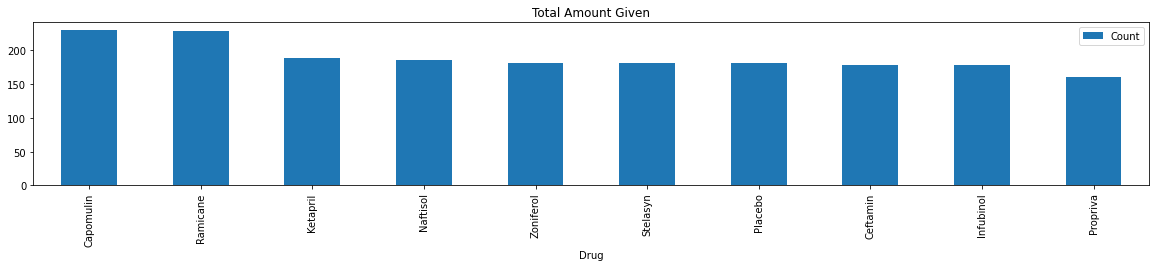

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# set new dataframe to  work with using Drug Regimen
drug_count = final_sort_time['Drug Regimen'].value_counts().reset_index()

#sort Drug Regimen value count into columns
drug_count.columns = ['Drug', 'Count']

#set drug names as index
drug_count = drug_count.set_index('Drug')

#plot the graph and give it a title
drug_count.plot(kind='bar', figsize=(20,3))
plt.title("Total Amount Given")



In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#set x axis and tick locations
x_axis = np.arange(len(final_sort_time['Drug Regimen'].unique()))
tick_locations = [value for value in x_axis]

#create an array to hold the drug names
drug_name = final_sort_time["Drug Regimen"].unique()



Text(0, 0.5, 'Doses Given')

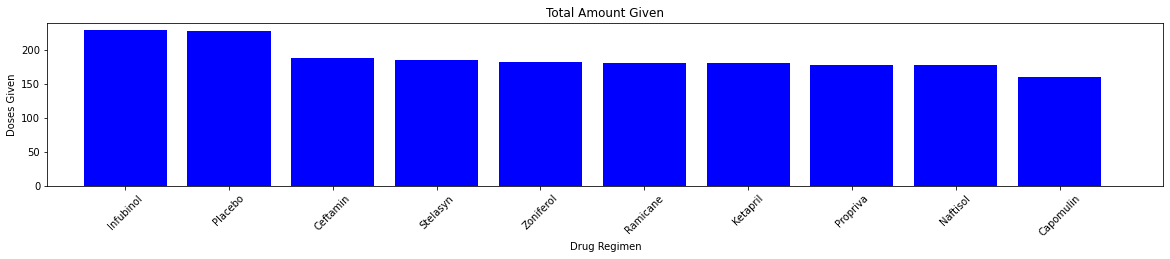

In [11]:
#set up the bar graph
plt.figure(figsize=(20,3))
plt.bar(x_axis, final_sort_time["Drug Regimen"].value_counts(), color='b', alpha=1, align="center")
plt.xticks(tick_locations, drug_name, rotation=45)

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(final_sort_time["Drug Regimen"].value_counts())+10)

#give labels
plt.title("Total Amount Given")
plt.xlabel("Drug Regimen")
plt.ylabel("Doses Given")

Text(0.5, 1.0, 'On The Basis of Sex')

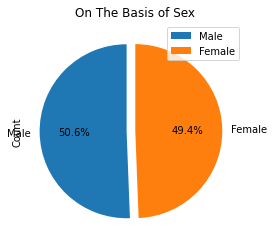

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# set new dataframe to  work with using Drug Regimen
gender_count = final_sort_time['Sex'].value_counts().reset_index()

#sort Drug Regimen value count into columns
gender_count.columns = ['Gender', 'Count']

# #set drug names as index
gender_count = gender_count.set_index('Gender')

explode=[0.1, 0]

# #plot the graph and give it a title
gender_count.plot.pie(autopct="%1.1f%%", explode=explode, startangle=90, subplots=True)
plt.title("On The Basis of Sex")


Text(0.5, 1.0, 'On The Basis of Sex')

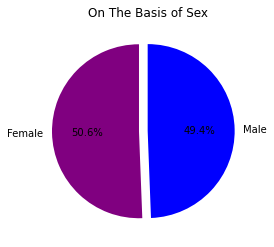

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count = final_sort_time["Sex"].value_counts().unique()
gender = final_sort_time['Sex'].unique()
colors = ['purple', 'blue']
explode = [0.1, 0]

plt.pie(count, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", startangle=90)
plt.title("On The Basis of Sex")

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_drugs = final_sort_time[final_sort_time["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
four_drugs = four_drugs.sort_values(["Timepoint"], ascending=True)
four_drugs

four_drugs_data = four_drugs[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

four_drugs_data.reset_index(drop=True)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_drugs_sort = four_drugs_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
four_drugs_df = four_drugs_sort.to_frame()
four_drugs_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.    
# Locate the rows which contain mice on each drug and get the tumor volumes
iqr_drug = four_drugs_df["Tumor Volume (mm3)"]
    
# add subset 
quartiles = iqr_drug.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq    
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Lower Bound: {lower_bound} \nUpper Bound: {upper_bound}")


Lower Bound: 3.0739668737499812 
Upper Bound: 94.04403868375002


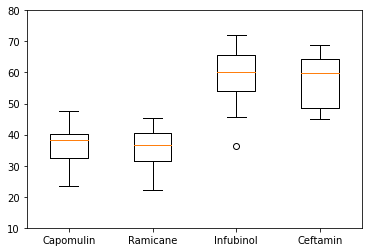

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol_data = four_drugs_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_vol_df = pd.DataFrame(tumor_vol_data)
tumor_vol_df = tumor_vol_df.reindex(treatments)
tumor_vols = [vol for vol in tumor_vol_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=treatments)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

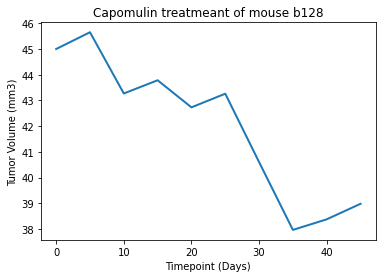

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#single out a mouse
capo_df = final_sort_time.loc[final_sort_time["Drug Regimen"] == "Capomulin",:]
mouse_line = capo_df.loc[capo_df["Mouse ID"] == "b128",:]

x_axis = mouse_line["Timepoint"]
tumor_data = mouse_line["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse b128')
plt.plot(x_axis, tumor_data ,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

#plt.savefig('linechart')
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
